# Which household factors significantly impact education?
## Amogh Giri, Ian Yeh, Rivke Weingarten

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

county_data = pd.read_csv("https://raw.githubusercontent.com/Amgg12301/CMSC320-Final/main/county_complete.csv")
county_data


,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,age_under_5_2010,age_under_5_2017,age_under_18_2010,age_over_65_2010,age_over_65_2017,median_age_2017,female_2010,white_2010,black_2010,black_2017,native_2010,native_2017,asian_2010,asian_2017,pac_isl_2010,pac_isl_2017,other_single_race_2017,two_plus_races_2010,two_plus_races_2017,hispanic_2010,hispanic_2017,white_not_hispanic_2010,white_not_hispanic_2017,speak_english_only_2017,no_move_in_one_plus_year_2010,foreign_born_2010,foreign_spoken_at_home_2010,women_16_to_50_birth_rate_2017,...,bachelors_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_asian_or_pac_isl_2019,households_speak_limited_english_2019,households_speak_other_2019,households_speak_other_indo_euro_lang_2019,households_speak_spanish_2019,housing_mobile_homes_2019,housing_one_unit_structures_2019,housing_two_unit_structures_2019,hs_grad_2019,mean_household_income_2019,mean_work_travel_2019,median_age_2019,median_household_income_2019,median_individual_income_2019,median_individual_income_age_25plus_2019,native_2019,other_single_race_2019,pac_isl_2019,per_capita_income_2019,persons_per_household_2019,pop_2019,poverty_2019,poverty_65_and_over_2019,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,55504.0,6.6,5.7,26.8,12.0,14.3,37.8,51.3,78.5,17.7,9.55,0.4,0.15,0.9,0.47,NaN,0.04,0.65,1.6,0.84,2.4,2.67,77.2,75.42,96.2,86.3,2.0,3.7,7.4,...,26.6,19.0,2.8,80.6,73.0,78.4,21397,1.8,0.7,0.2,0.3,2.9,26.7,17.3,73.3,88.5,75326,24.4,38.2,58731,29725,40778,0.3,0.7,0.0,29819,2.56,55380,15.2,8.7,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,207509.0,212628.0,6.1,5.7,23.0,16.8,19.0,42.6,51.1,85.7,9.4,4.77,0.7,0.41,0.7,0.35,NaN,0.00,0.39,1.5,0.82,4.4,4.44,83.5,83.08,94.5,83.0,3.6,5.5,5.1,...,31.9,9.3,4.6,81.8,76.3,81.7,80930,0.6,1.2,0.0,1.8,4.6,24.8,11.5,75.2,90.8,80986,NaN,43.0,58320,29802,37897,0.8,1.1,0.0,32626,2.59,212830,10.4,7.4,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,25774.0,25270.0,6.2,5.5,21.9,14.2,17.4,39.7,46.9,48.0,46.9,24.02,0.4,0.10,0.4,0.31,NaN,0.00,1.87,0.9,0.41,5.1,4.21,46.8,45.74,94.3,83.0,2.8,4.7,7.2,...,11.6,47.6,4.4,60.5,51.9,64.2,9345,0.6,1.6,0.0,1.1,5.2,39.1,26.1,60.9,73.2,47068,NaN,40.4,32525,17963,27434,0.3,3.6,0.0,18473,2.41,25361,30.7,16.8,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,22633.0,22668.0,6.0,5.7,22.7,12.7,15.1,39.8,46.3,75.8,22.0,11.03,0.3,0.18,0.1,0.00,NaN,0.00,0.02,0.9,0.42,1.8,2.35,75.0,74.62,97.8,90.5,0.7,1.5,7.6,...,10.4,22.3,2.6,69.2,54.7,66.6,6891,0.0,0.6,0.0,0.5,1.9,25.6,29.7,74.4,79.1,60182,NaN,40.9,47542,21958,28789,0.1,0.0,0.0,20778,2.99,22493,NaN,NaN,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,57562.0,58013.0,6.3,6.1,24.6,14.7,17.4,40.9,50.5,92.6,1.3,0.79,0.5,0.18,0.2,0.07,NaN,0.00,0.37,1.2,0.85,8.1,9.01,88.9,87.37,92.3,87.2,4.7,7.2,5.6,...,13.1,1.6,9.3,73.0,63.5,70.1,20847,0.1,1.8,0.2,0.9,6.6,21.2,24.0,78.8,80.5,65639,NaN,40.7,49358,26976,39004,0.1,0.9,0.0,24747,2.74,57681,13.6,10.9,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Swe

In [3]:
average_household_income = round(county_data['median_household_income_2017'].sum() / len(county_data['median_household_income_2017']), 0)
average_computer = round(county_data['computer_2017'].sum() / len(county_data['computer_2017']), 0)
average_bachelors = round(county_data['bachelors_2017'].sum() / len(county_data['bachelors_2017']), 0)

for index, row in county_data.iterrows():
    if np.isnan(row['median_household_income_2017']):
        county_data.loc[index, 'median_household_income_2017'] = average_household_income

    if np.isnan(row['computer_2017']):
        county_data.loc[index, 'computer_2017'] = average_computer

    if np.isnan(row['bachelors_2017']):
        county_data.loc[index, 'bachelors_2017'] = average_bachelors

print(county_data['median_household_income_2017'].isnull().values.any())
print(county_data['computer_2017'].isnull().values.any())
print(county_data['bachelors_2017'].isnull().values.any())

False
False
False


In [4]:
average_hs_grad = round(county_data['hs_grad_2017'].sum() / len(county_data['hs_grad_2017']), 0)
average_persons_per_household = round(county_data['persons_per_household_2017'].sum() / len(county_data['persons_per_household_2017']), 0)

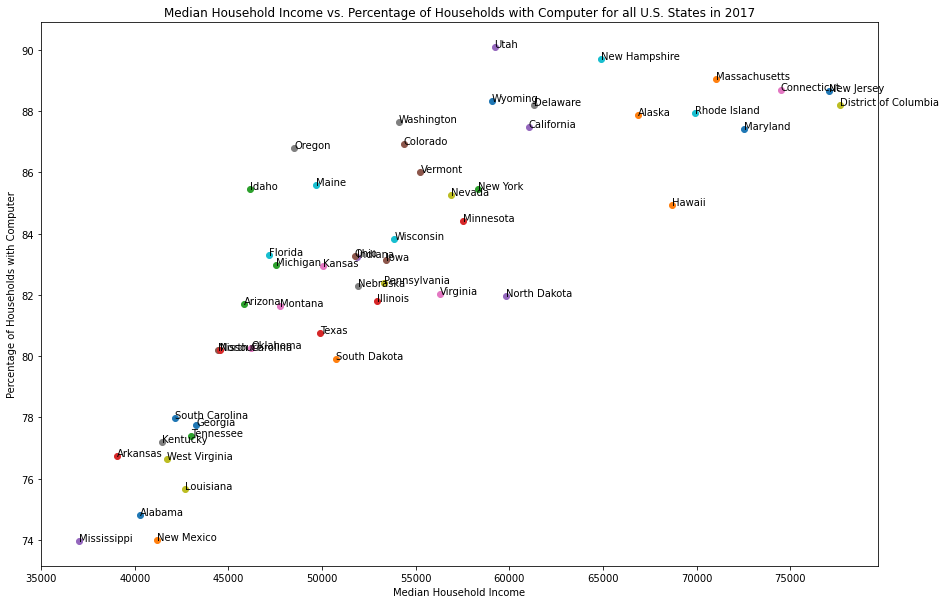

In [6]:
states = county_data['state'].unique()
plt.figure(figsize=(15,10))

for state in states:
    average_income = county_data[county_data.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_computer = county_data[county_data.state == state]['computer_2017']
    average_computer = average_computer.sum() / len(average_computer)

    plt.scatter(average_income, average_computer)
    plt.annotate(state, (average_income, average_computer))

plt.title('Median Household Income vs. Percentage of Households with Computer for all U.S. States in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

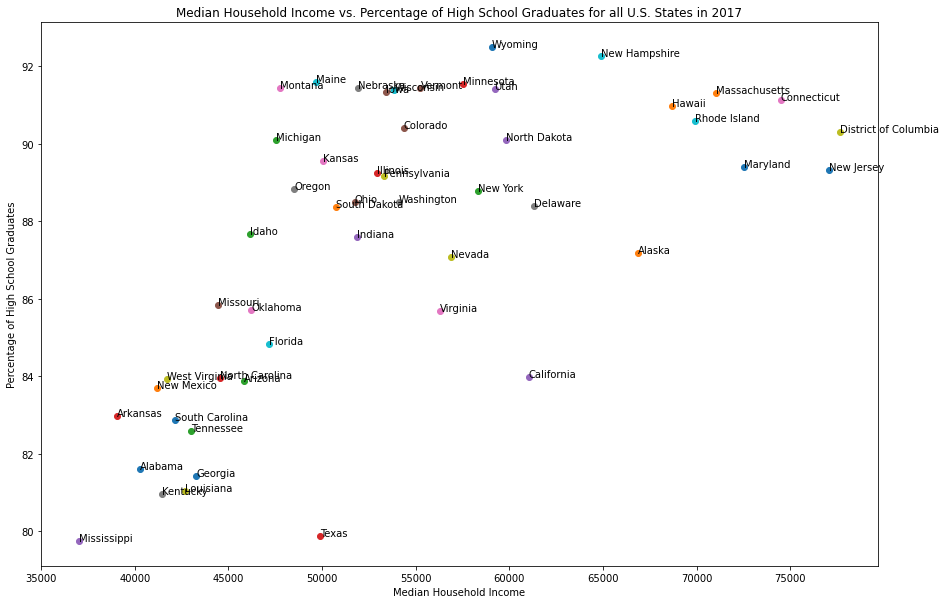

In [7]:
plt.figure(figsize=(15,10))

for state in states:
    average_income = county_data[county_data.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_hs_grad = county_data[county_data.state == state]['hs_grad_2017']
    average_hs_grad = average_hs_grad.sum() / len(average_hs_grad)

    plt.scatter(average_income, average_hs_grad)
    plt.annotate(state, (average_income, average_hs_grad))

plt.title('Median Household Income vs. Percentage of High School Graduates for all U.S. States in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School Graduates')
plt.show()

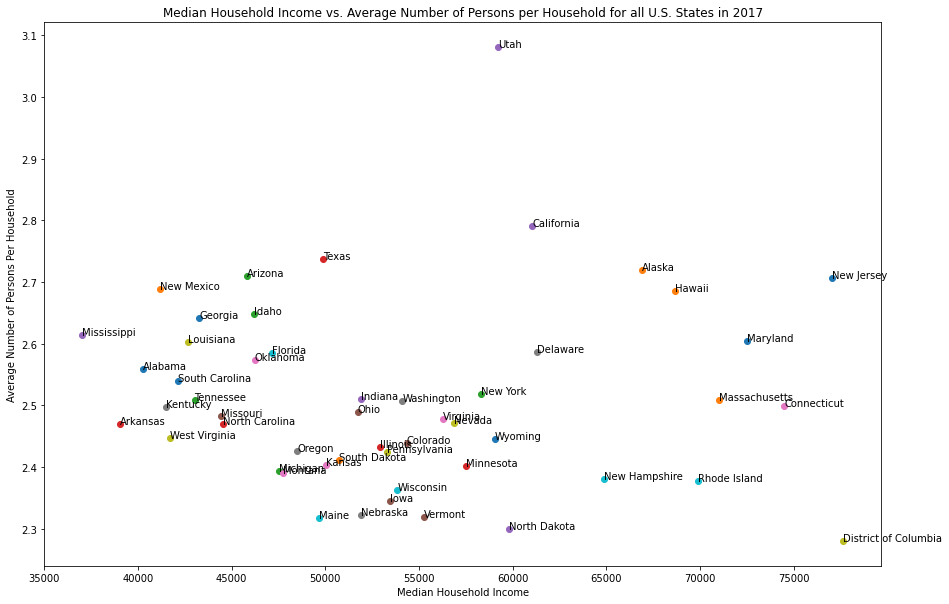

In [10]:

plt.figure(figsize=(15,10))

for state in states:
    average_income = county_data[county_data.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_persons_per_household = county_data[county_data.state == state]['persons_per_household_2017']
    average_persons_per_household = average_persons_per_household.sum() / len(average_persons_per_household)

    plt.scatter(average_income, average_persons_per_household)
    plt.annotate(state, (average_income, average_persons_per_household))

plt.title('Median Household Income vs. Average Number of Persons per Household for all U.S. States in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Average Number of Persons Per Household')
plt.show()

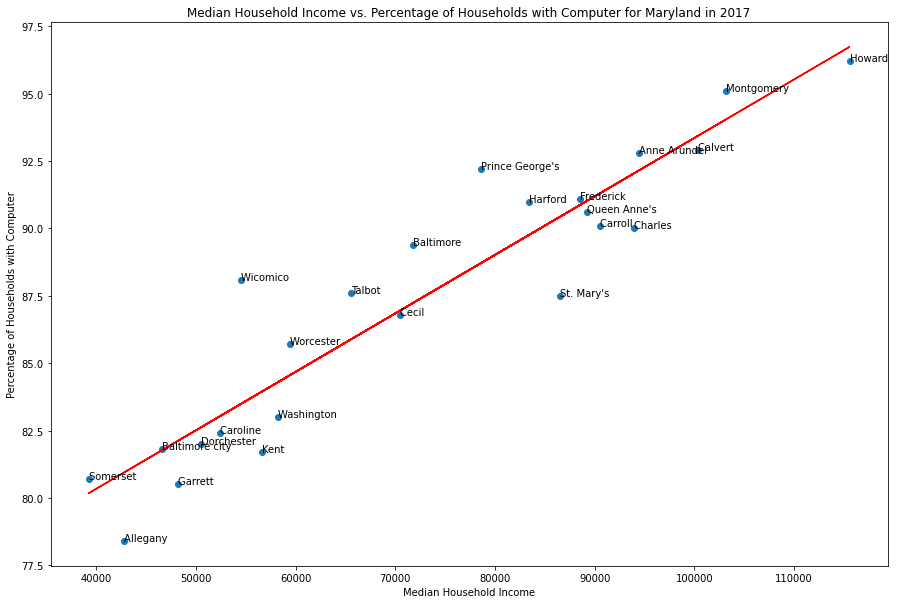

In [11]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['computer_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['computer_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['computer_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with Computer for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

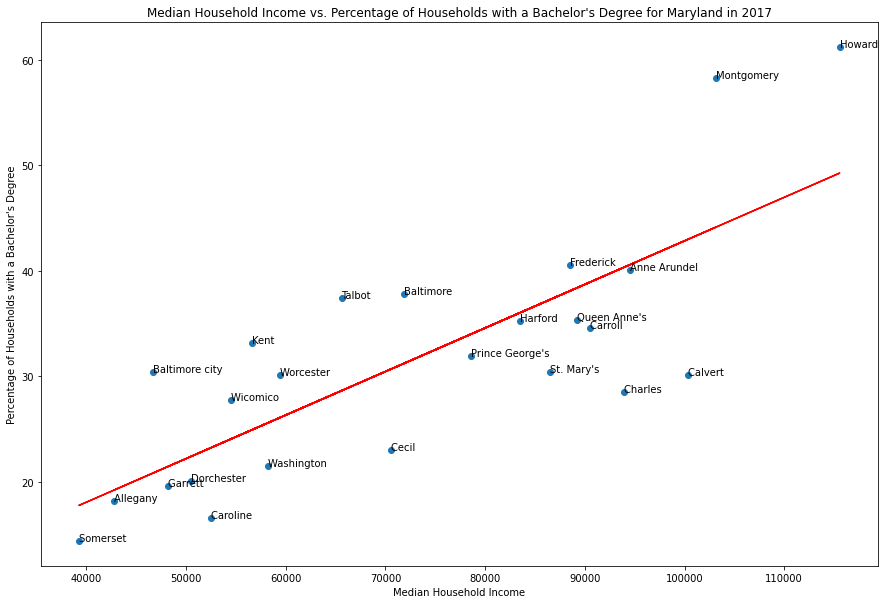

In [12]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

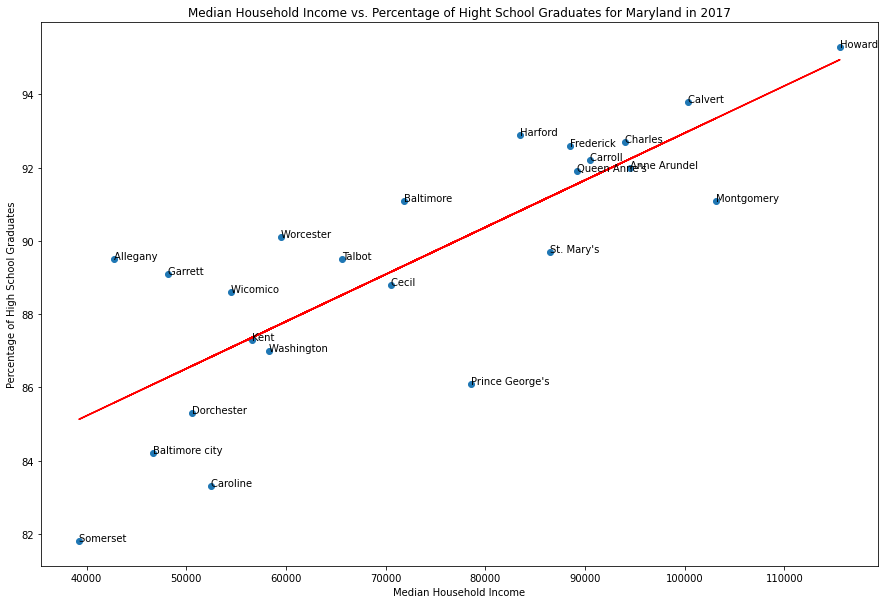

In [14]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['hs_grad_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['hs_grad_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['hs_grad_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of High School Graduates for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School Graduates')
plt.show()

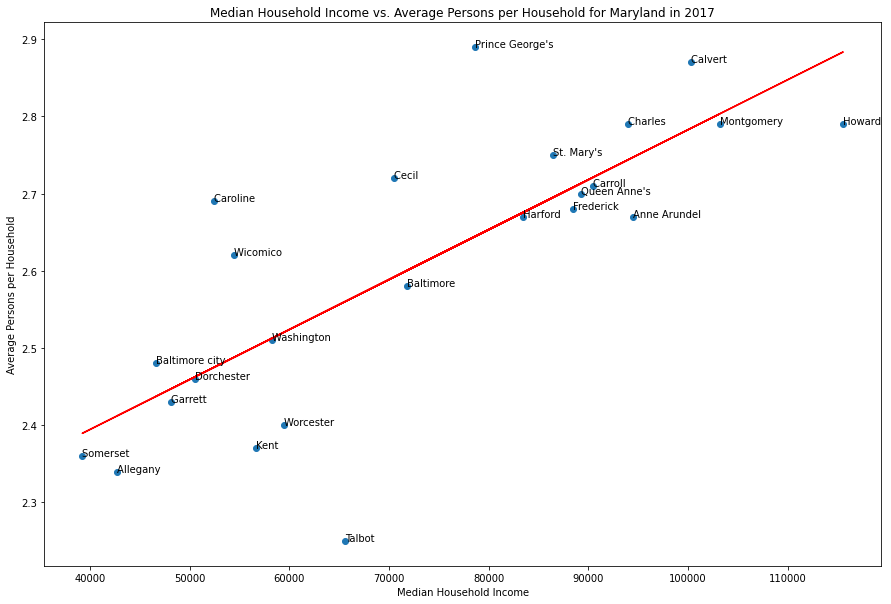

In [15]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['persons_per_household_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['persons_per_household_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['persons_per_household_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Average Persons per Household for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Average Persons per Household')
plt.show()

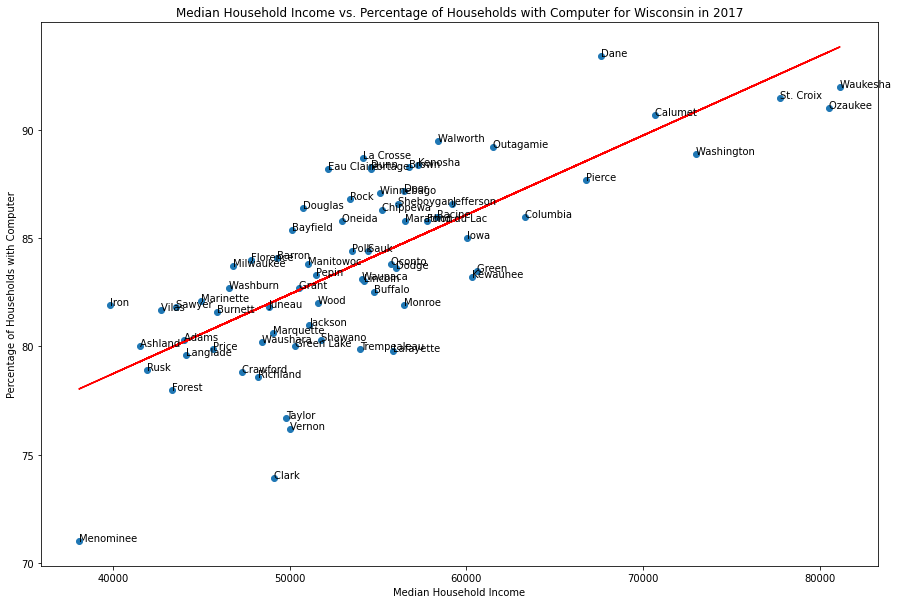

In [ ]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Wisconsin']
plt.scatter(state['median_household_income_2017'], state['computer_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['computer_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['computer_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with Computer for Wisconsin in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

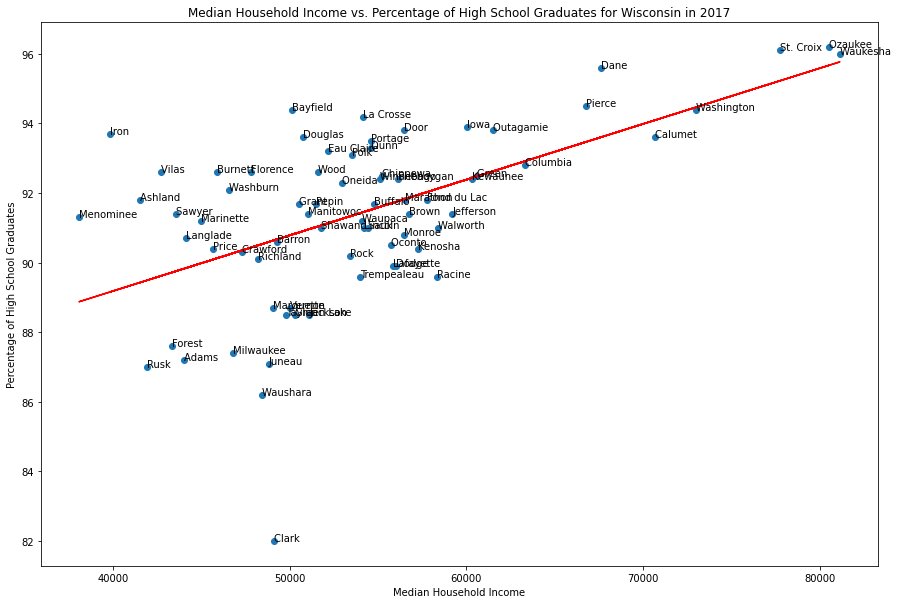

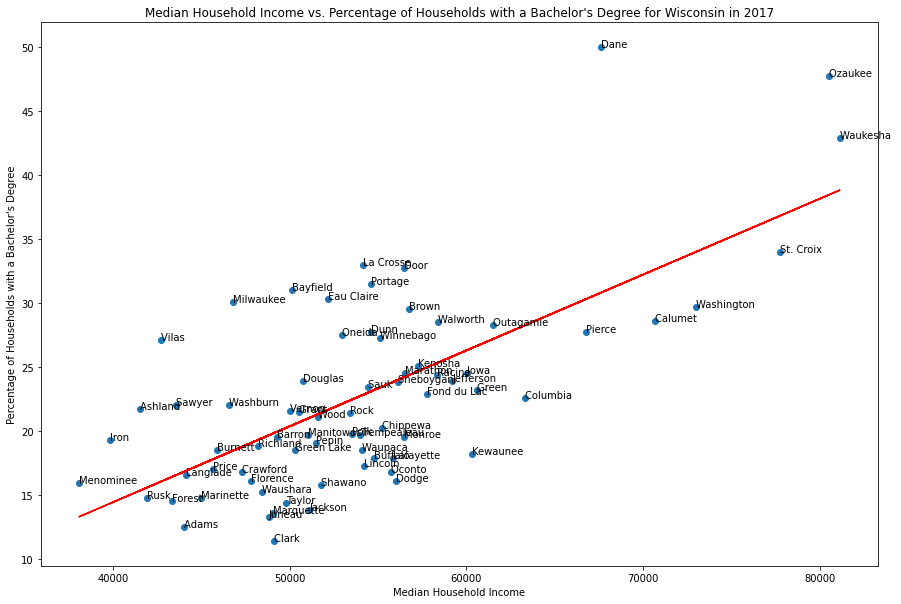

In [ ]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Wisconsin']
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Wisconsin in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

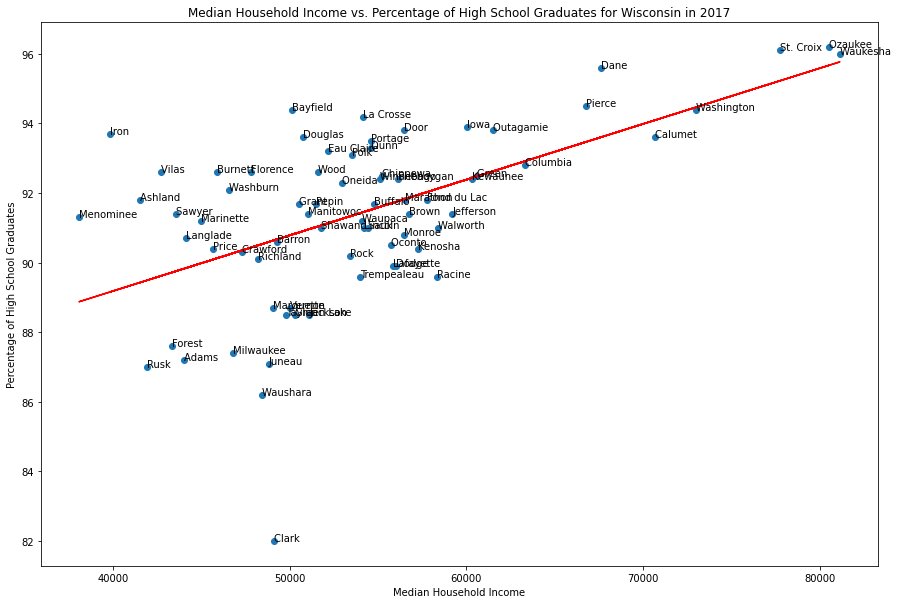

In [17]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Wisconsin']
plt.scatter(state['median_household_income_2017'], state['hs_grad_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['hs_grad_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['hs_grad_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of High School Graduates for Wisconsin in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School Graduates')
plt.show()

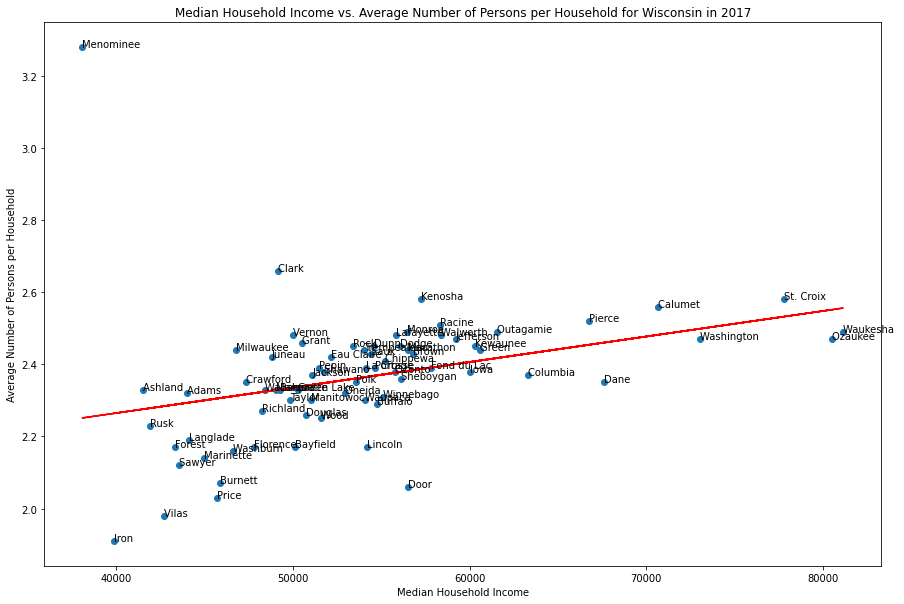

In [19]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Wisconsin']
plt.scatter(state['median_household_income_2017'], state['persons_per_household_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['persons_per_household_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['persons_per_household_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Average Number of Persons per Household for Wisconsin in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Average Number of Persons per Household')
plt.show()

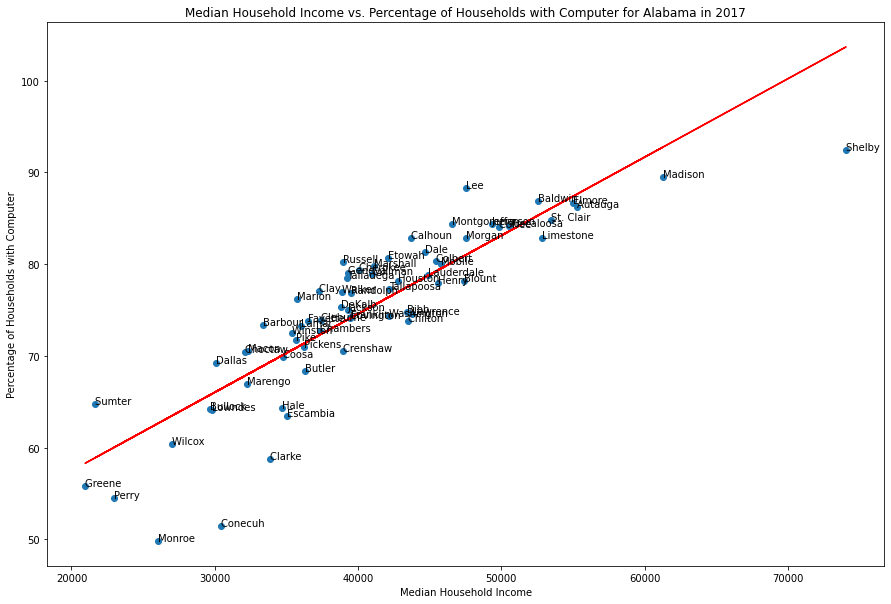

In [ ]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Alabama']
plt.scatter(state['median_household_income_2017'], state['computer_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['computer_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['computer_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with Computer for Alabama in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

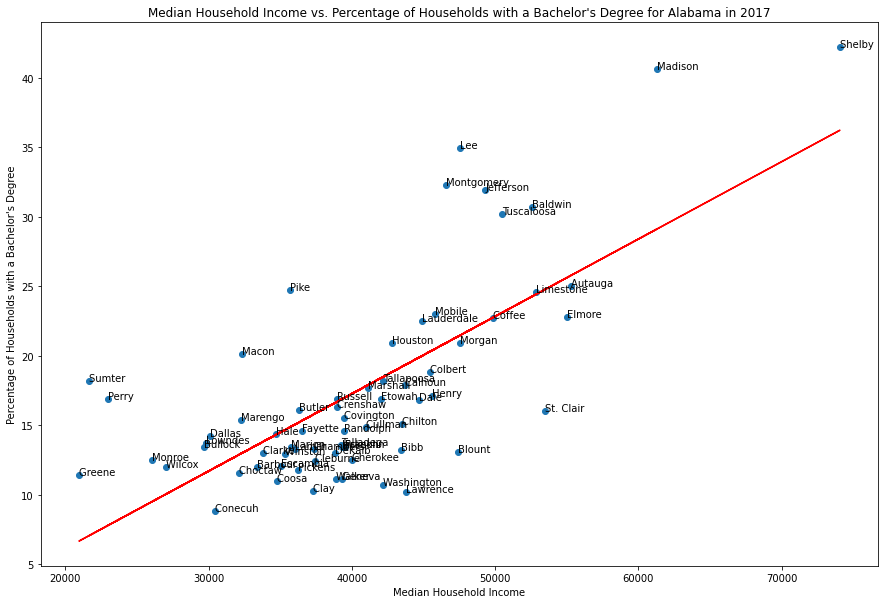

In [ ]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Alabama']
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Alabama in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

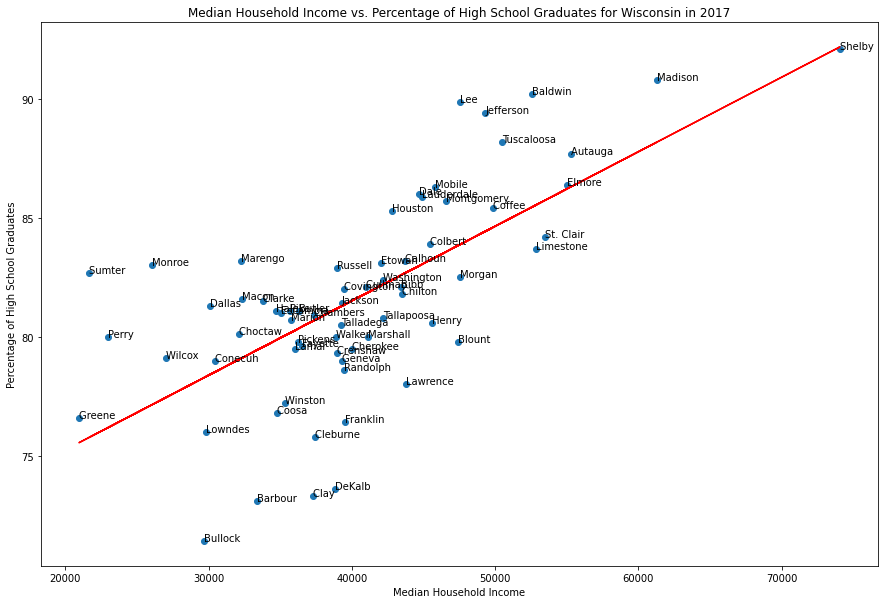

In [20]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Alabama']
plt.scatter(state['median_household_income_2017'], state['hs_grad_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['hs_grad_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['hs_grad_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of High School Graduates for Alabama in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School Graduates')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Alabama']
plt.scatter(state['median_household_income_2017'], state['persons_per_household_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['persons_per_household_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['persons_per_household_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Average Number of Persons per Household for Alabama in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Average Number of Persons per Household')
plt.show()

In [ ]:
import statsmodels.api as sm

state_data = county_data[county_data.state == 'Maryland']
y = state_data['bachelors_2017']
x = state_data['median_household_income_2017'] / 1000
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bachelors_2017   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     34.26
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.86e-06
Time:                        00:42:33   Log-Likelihood:                -80.864
No. Observations:                  24   AIC:                             165.7
Df Residuals:                      22   BIC:                             168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.5924      5.326      0.299      0.768      -9.453      12.638
median_household_income_2017     0.4124      0.070      5.854      0.000       0.266       0.559
==============================================================================
Omnibus:                        0.547   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.649
Skew:                           0.234   Prob(JB):                        0.723
Kurtosis:                       2.344   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
state_data = county_data[county_data.state == 'Maryland']
y = state_data['computer_2017']
x = state_data['median_household_income_2017'] / 1000
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          computer_2017   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     145.6
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.58e-11
Time:                        00:42:34   Log-Likelihood:                -48.091
No. Observations:                  24   AIC:                             100.2
Df Residuals:                      22   BIC:                             102.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           71.6620      1.359     52.715      0.000      68.843      74.481
median_household_income_2017     0.2170      0.018     12.065      0.000       0.180       0.254
==============================================================================
Omnibus:                        2.949   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                1.743
Skew:                           0.649   Prob(JB):                        0.418
Kurtosis:                       3.244   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""